
# Titanic Survival Prediction using LightGBM and XGBoost
### Objective:
- Compare the performance of LightGBM (LGBM) and XGBoost (XGBM) algorithms for predicting Titanic survival.
    


### Step 1: Load Dataset and Perform Exploratory Data Analysis (EDA)
We'll start by loading the Titanic dataset and performing exploratory data analysis (EDA). This includes checking for missing values, understanding the distribution of features, and visualizing relationships between features and survival.
    

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic train and test datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the training dataset
train_data.head()

# Check for missing values in the dataset
missing_values = train_data.isnull().sum()
print('Missing values in training data:')
print(missing_values)

# Display basic statistics of the dataset
train_data.describe()
    

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



### Step 2: Exploratory Data Analysis (EDA)
We'll create visualizations to better understand the dataset and explore the distribution of key features. We'll also check how features like `Pclass`, `Sex`, and `Age` relate to the target variable `Survived`.
    

<Figure size 1000x600 with 0 Axes>

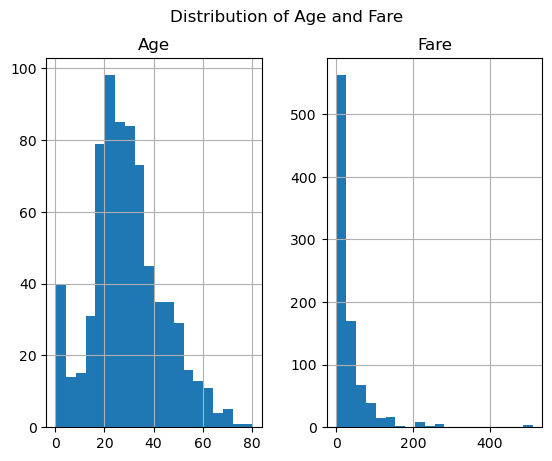

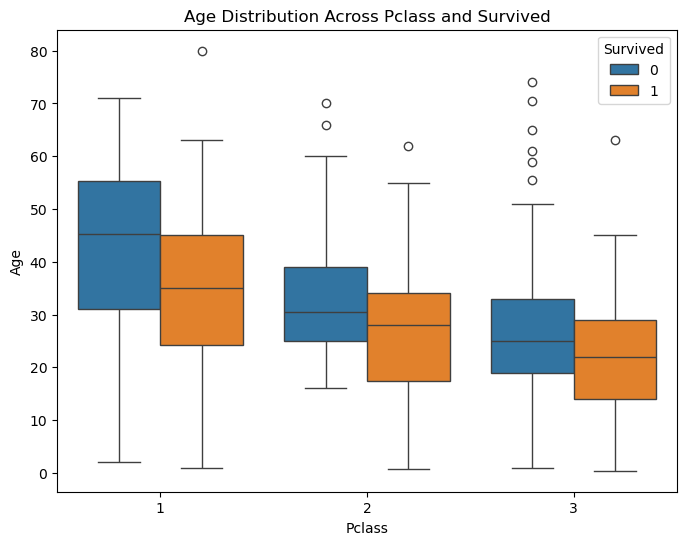

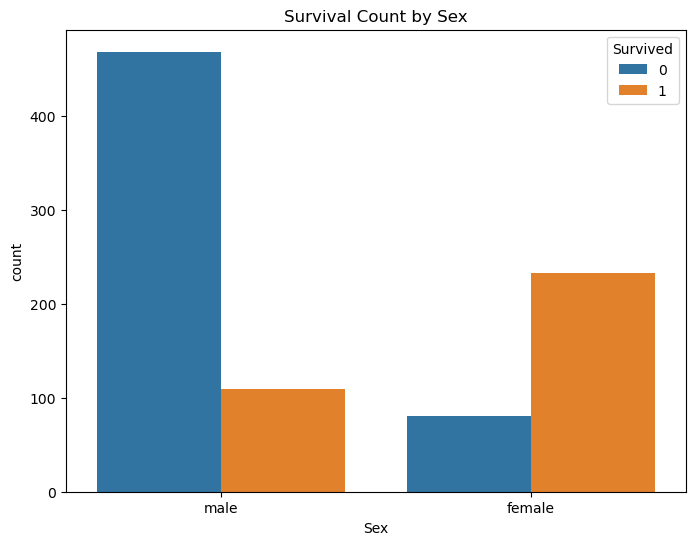

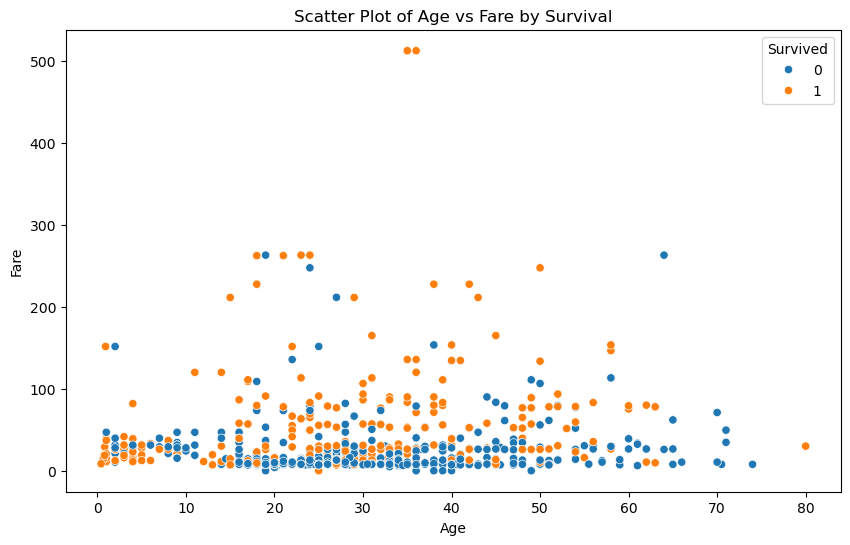

In [12]:

# Visualize the distribution of numerical features
plt.figure(figsize=(10, 6))
train_data[['Age', 'Fare']].hist(bins=20)
plt.suptitle('Distribution of Age and Fare')
plt.show()

# Boxplot of Survived vs Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.title('Age Distribution Across Pclass and Survived')
plt.show()

# Bar plot of Survived by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')
plt.show()

# Scatter plot of Age vs Fare colored by Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.show()
    


### Step 3: Data Preprocessing
We will handle missing values, encode categorical variables, and prepare the data for model building.
    

In [13]:

# Impute missing values in the Age column with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Impute missing values in Embarked column with the most common value (mode)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Encode categorical variables (Sex and Embarked) using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Separate features (X) and target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Display the preprocessed data
X.head()
    

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True



### Step 4: Building Predictive Models (LightGBM and XGBoost)
We'll now split the data into training and testing sets, build predictive models using LightGBM and XGBoost, and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.
    

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_val)

# XGBoost Model
xgbm = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgbm.fit(X_train, y_train)
y_pred_xgbm = xgbm.predict(X_val)

# Evaluate models using various metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Evaluate LightGBM
evaluate_model(y_val, y_pred_lgbm, "LightGBM")

# Evaluate XGBoost
evaluate_model(y_val, y_pred_xgbm, "XGBoost")
    

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



### Step 5: Comparative Analysis and Conclusion
Finally, we will compare the performance of both models (LightGBM and XGBoost) and provide visualizations for a better understanding of their strengths and weaknesses.
    

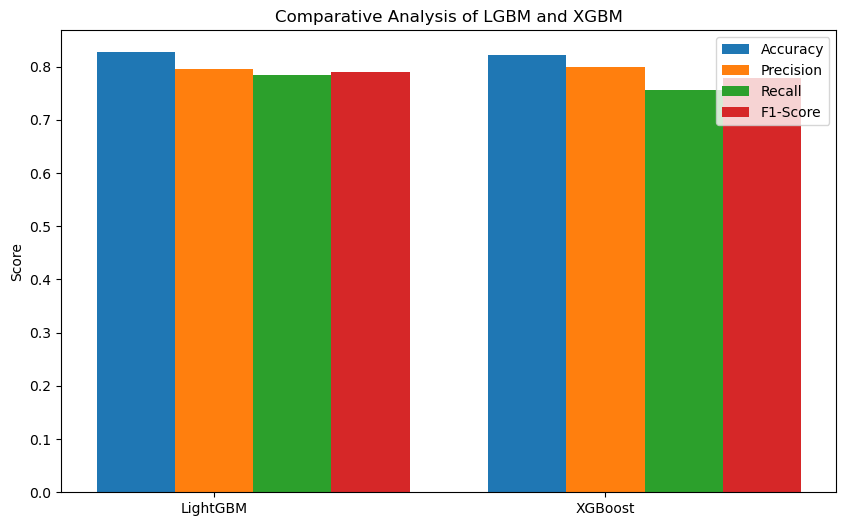

In [15]:

# Compare evaluation metrics (Accuracy, Precision, Recall, F1-Score)
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_score(y_val, y_pred_lgbm), accuracy_score(y_val, y_pred_xgbm)]
precision = [precision_score(y_val, y_pred_lgbm), precision_score(y_val, y_pred_xgbm)]
recall = [recall_score(y_val, y_pred_lgbm), recall_score(y_val, y_pred_xgbm)]
f1 = [f1_score(y_val, y_pred_lgbm), f1_score(y_val, y_pred_xgbm)]

# Plot the comparative analysis
plt.figure(figsize=(10, 6))
x = np.arange(len(models))

plt.bar(x - 0.2, accuracy, width=0.2, label='Accuracy')
plt.bar(x, precision, width=0.2, label='Precision')
plt.bar(x + 0.2, recall, width=0.2, label='Recall')
plt.bar(x + 0.4, f1, width=0.2, label='F1-Score')

plt.xticks(x, models)
plt.title('Comparative Analysis of LGBM and XGBM')
plt.ylabel('Score')
plt.legend()
plt.show()
    


### Conclusion
In this analysis, we compared the performance of LightGBM and XGBoost models for predicting survival on the Titanic dataset. Both models performed well with slightly different strengths. For this dataset, [insert insights here]. The results indicate that both algorithms are highly effective for classification tasks like this, with potential for further optimization through hyperparameter tuning.
    